### Holdout Method(Sampling)
- sklearn.model_selection.train_test_split을 이용
- 데이터를 Training과 Test로 나눠서 모델을 생성하고 테스트하는 기법
- 가장 일반적인 모델 생성을 위한 데이터 랜덤 샘플링 기법
- Training과 Test를 나누는 비율은 데이터의 크기에 따라 다름

### 성능 측정을 위해 데이터를 나누는 방법
- Training(60%) : Model Building
- Validation(20%) : Model Check
    - Test Set은 Model 생성 시 절대 Training Set에 포함되지 않아야 함!
    - Test Set과 달리 Model 생성 시 Model 성능을 평가하기 위해 사용
    - Hyper Parameter Tuning 시 성능 평가를 통해 Overfitting 방지
    - Training 중간에 Model의 성능을 점검
- Test(20%) : Model Evaluation

### K-fold cross validation
- 학습 데이터를 K번 나눠서 Test와 Train을 실시 → Test의 <b>평균값</b>을 사용
- 모델의 Parameter Tuning, 간단한 모델의 최종 성능 측정 등 사용
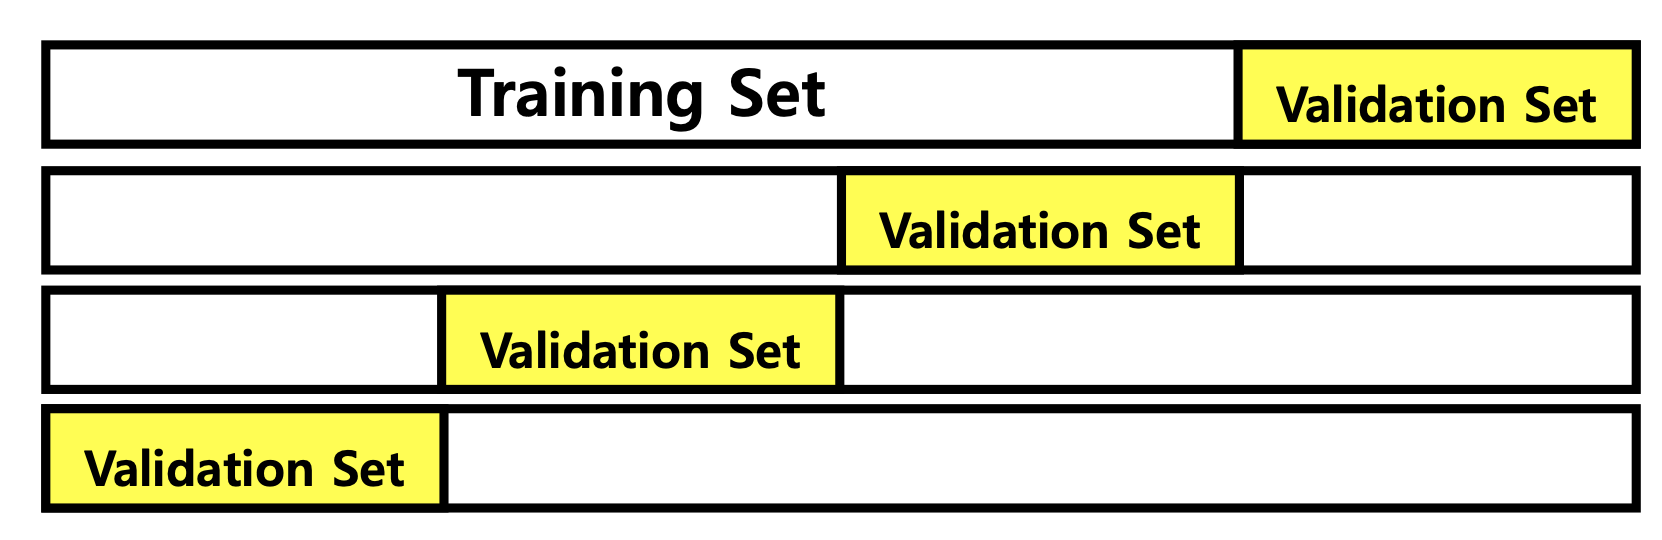

In [1]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [2]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", len(train_index))
    print("TEST - ",  len(test_index)) 

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


In [3]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.46408458830232, 34.07824620925941)

### K-fold cross validation
- cross_val_score 함수로 한번에 해결 가능!
- sklearn은 pipeline 등을 위해 "High is Better"로 처리
    ⇢ MSE를 Negative로 변환
- 이로 인해 RMSE("Small is Better")를 지원하지 않음
- (ex) R<sup>2</sup> score, Accuracy는 큰 값일수록 좋음

In [4]:
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = Lasso(warm_start = False)   # warm_start : 기본값인 False는 previous solution을 고려하지 않음. True로 설정하면 initialize할 때 previous solution을 재사용.
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830232, -34.07824620925941)

In [5]:
lasso_scores

array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
        -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
        -22.8731834 ,  -13.30594575])

In [6]:
ridge_scores

array([  -9.31766315,  -12.60806897,  -10.79859434,  -36.6093648 ,
        -29.62109212,  -18.62598134,   -9.46641896, -168.49831117,
        -33.79749469,  -11.43947255])

##### cross_validate는 다양한 지표들을 함께 보여줌
- cross_val_score과 달리, scoring에 복수의 metric을 설정할 수 있음
- But, 주로 cross_val_score를 많이 사용

In [7]:
from sklearn.model_selection import cross_validate

lasso_regressor = Lasso(warm_start = False)   # warm_start : 기본값인 False는 previous solution을 고려하지 않음. True로 설정하면 initialize할 때 previous solution을 재사용.
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']

# return_train_score 인자를 True로 설정하지 않으면 test score만 출력
lasso_scores = cross_validate(lasso_regressor, X, y, cv = 10, scoring = scoring, return_train_score = True)
ridge_scores = cross_validate(ridge_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error', return_train_score = True)
lasso_scores

{'fit_time': array([0.00129724, 0.00054502, 0.00058794, 0.000633  , 0.00070596,
        0.00068307, 0.00069809, 0.00056815, 0.00058007, 0.0009799 ]),
 'score_time': array([0.00083685, 0.00049305, 0.00044107, 0.00054312, 0.00051522,
        0.00052476, 0.00046778, 0.00048399, 0.00065994, 0.00060225]),
 'test_neg_mean_squared_error': array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
         -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
         -22.8731834 ,  -13.30594575]),
 'train_neg_mean_squared_error': array([-28.25616949, -28.09567503, -28.29232348, -25.600492  ,
        -26.95096346, -27.99388031, -28.4162528 , -16.87943219,
        -26.20686855, -27.76810381]),
 'test_r2': array([ 0.66289033,  0.33452353, -0.50043664,  0.38035161,  0.33638098,
         0.4584511 , -0.0816218 ,  0.31138236, -0.21362102,  0.29459703]),
 'train_r2': array([0.68411229, 0.68946643, 0.68782251, 0.65147357, 0.67374543,
        0.62987343, 0.69067269, 0.77241751, 0.68011836

In [8]:
from sklearn.model_selection import cross_val_score

lasso_regressor = Lasso(warm_start = False)   # warm_start : 기본값인 False는 previous solution을 고려하지 않음. True로 설정하면 initialize할 때 previous solution을 재사용.
ridge_regressor = Ridge()

kf = KFold(n_splits = 10, shuffle = True)

lasso_scores = cross_val_score(lasso_regressor, X, y, cv = kf, scoring = 'neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv = kf, scoring = 'neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.46192763458065, -24.312390926717494)

### Check variation of cross validation

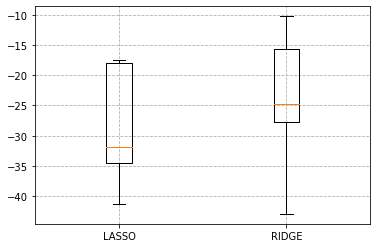

In [9]:
import matplotlib.pyplot as plt

labels = ['LASSO', "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels = labels)
plt.grid(linestyle = '--')
plt.show()

### Leave One Out(LOO)
- Simple cross validation → k = data size
- <b>한번에 한 개의 데이터만</b> Test Set으로 사용함 → 총 k번 iteration
- 시간이 상당히 오래 걸리고 성능 또한 별로 좋지 않아 잘 사용되지 않음
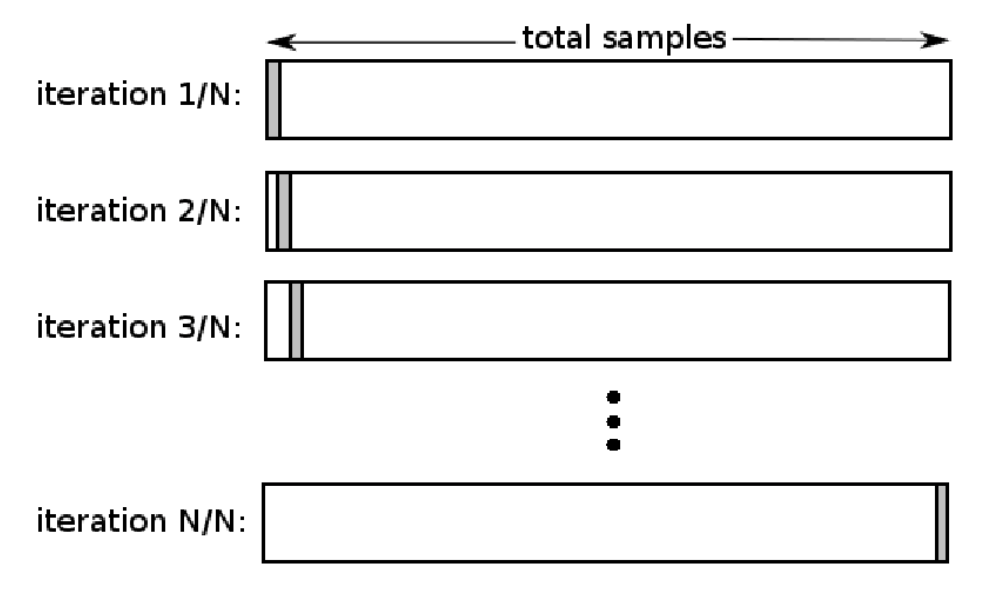

In [10]:
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" %(train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [11]:
loo = LeaveOneOut()

# cv = loo로 설정
lasso_scores = cross_val_score(lasso_regressor, X, y, cv = loo, scoring = 'neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv = loo, scoring = 'neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.409266762049334, -23.862836317209965)

### Validation set for parameter tuning
- Validation set의 많은 이유 중 하나가 <b>Hyper parameter tuning</b>
- Number of iterations(SGD), Number of branch(Tree-based) 등
- <b>Validation set의 성능으로 최적의 parameter를 찾음</b>
- Validation set 결과와 Training set 결과의 차이가 벌어지면 overfitting

### 그 이외의 Sampling Method
- <b>StratifiedKFold : Y값 비율에 따라 뽑음</b>(층화추출) → 'Classification' 문제 중 <b>데이터가 불균형한 경우</b> 주로 사용됨
- RepeatedKFold : 중복이 포함된 K-Fold 생성
- LeavePOut : 한번에 P개를 뽑음 (Not LOO for one data)
- ShuffleSplit : 독립적인(중복되는) 데이터 Sampling
- GroupKFold : 그룹별로 데이터를 Sampling

In [12]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [32]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.01       # learning rate
max_iter = 100

In [33]:
from sklearn.model_selection import train_test_split

X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

# warm_start를 True로 설정해서 tensorflow처럼 weight와 intercept를 reset하지 않고 계속 업데이트
sgd_regressor = SGDRegressor(eta0 = eta0, max_iter = max_iter, warm_start = True, learning_rate = 'constant')

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(X_train_dataset, y_train_dataset, test_size = 0.2, random_state = 42)
sgd_regressor.fit(X_train, y_train)

# kf = KFold(n_splits = 100, shuffle = True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):
    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))
    
    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)
    
    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()
    
    sgd_regressor = SGDRegressor(eta0 = eta0, max_iter = max_iter, warm_start = True, learning_rate = 'constant')
    sgd_regressor.fit(X_train, y_train, coef_init = coef, intercept_init = intercept)

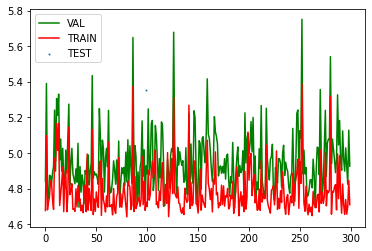

In [34]:
plt.plot(range(len(rmse_val_score)), rmse_val_score, c = "g", label = "VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score, c = "r", label = "TRAIN")
plt.scatter(99, rmse(y_test, sgd_regressor.predict(X_test)), s = 1, label = "TEST")
plt.legend()
plt.show()

In [35]:
np.argsort(rmse_val_score)     # argsort : 작은 값부터 순서대로 데이터의 index를 반환

array([186, 265,  33, 117, 149,  90,  38,  98, 245,  73, 225,   3,  92,
       215, 257, 181, 129,   2, 207, 258, 195, 140, 139, 224, 240,  64,
        35,  58, 272, 118, 106, 111, 119, 259,  65, 209,  71, 153, 216,
       214, 142,  19, 122, 262, 232, 239,  78,  24, 150,  43,  52, 297,
        63,  69,  29,   6, 145,  85,  82,  74, 228, 183, 273, 136,  87,
        31, 208,  80,  37, 164,   0, 213, 137,  18, 220, 260, 261, 177,
       180,  66, 185,  28,  51,  55,  47, 107, 113, 244, 241, 182, 276,
       190,  96,   5, 170, 144, 187, 235,   4,  49, 102,  36, 269, 264,
        50, 253, 255, 100,  40, 121,  27,  76, 205, 173,  21, 175,   7,
       242, 285, 192, 227, 249,  91,  48,  44, 238,  16, 294,  10, 219,
       266,  39,  68, 291, 193, 163,  30, 237, 211, 148, 171,  75, 226,
       256,  77, 128,  93,  84,  61,  34, 296, 174, 103, 299,   8, 172,
        99, 191, 134, 131, 281,  25, 231, 197,  45, 157, 246, 236, 290,
       110,  94, 116,  67, 165, 135,  41,  14,  70, 133, 284, 12

In [36]:
rmse(y_test, sgd_regressor.predict(X_test))

5.355891295250364

In [37]:
rmse(y_test, model_list[186].predict(X_test))

4.849079690330843

In [38]:
model_list[0].coef_

array([-0.86175213,  0.67832674,  0.13443275,  0.88980678, -2.32713107,
        3.51131155, -0.05051949, -3.1535902 ,  1.87668594, -1.17073719,
       -1.53518268,  1.53935406, -3.2169707 ])